In [1]:
import numpy as np
import pandas as pd
# data from: https://www.kaggle.com/c/bike-sharing-demand
# import data
train = pd.read_csv("../Downloads/train.csv", parse_dates = ["datetime"])
test = pd.read_csv("../Downloads/test.csv", parse_dates = ["datetime"])

In [2]:
# Split "datetime"
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


In [5]:
# import libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='year_month', ylabel='count'>

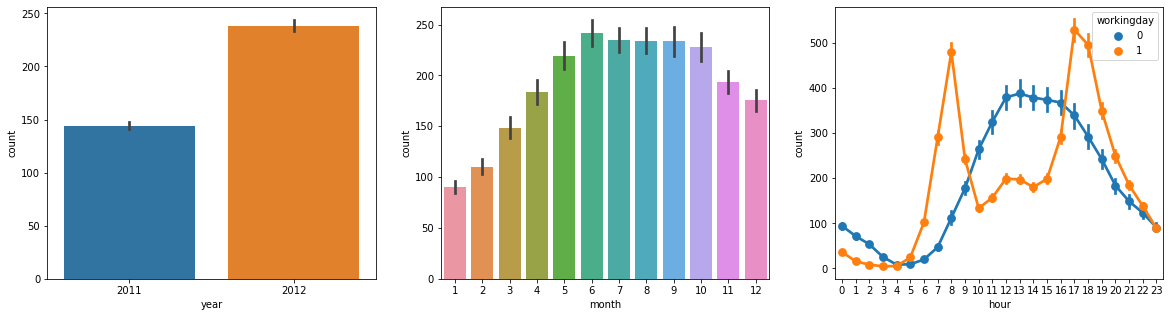

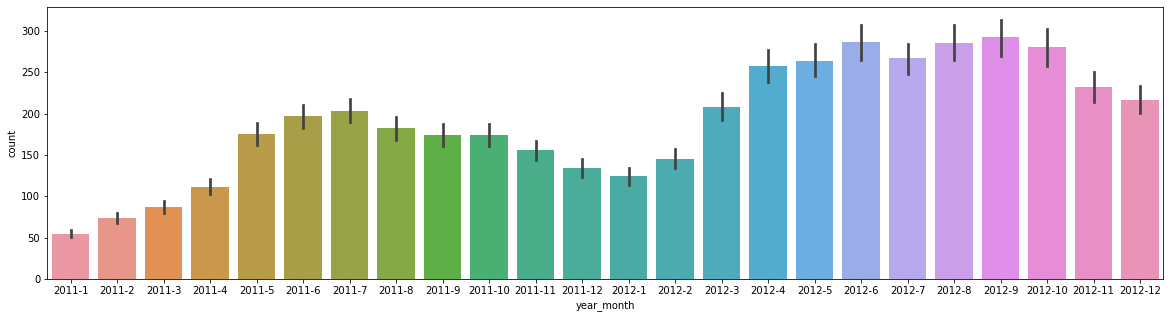

In [6]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(20, 5)


# let's see the big trend by year-month
train["year(str)"] = train["year"].astype('str')
train["month(str)"] = train["month"].astype('str')
train["year_month"] = train["year(str)"] + "-" + train["month(str)"]

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax3)

figure, (ax4) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20, 5)
sns.barplot(data=train, x="year_month", y="count", ax=ax4)

/Users/catherinepark/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/catherinepark/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count(log)', ylabel='Density'>

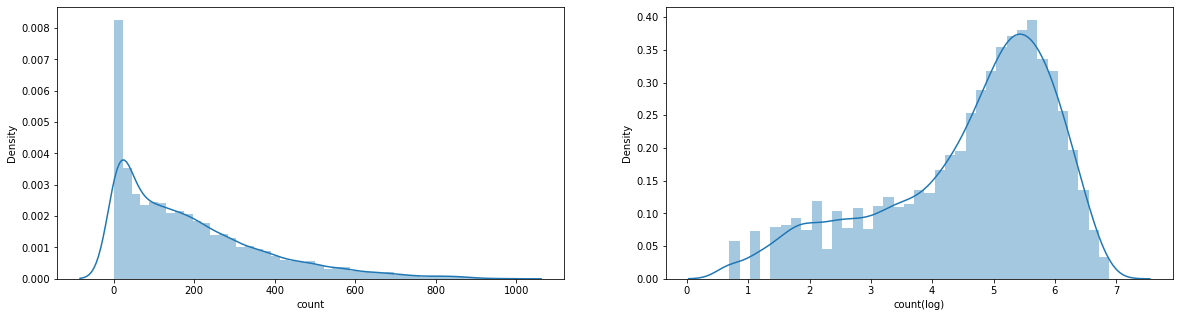

In [7]:
# Preprocessing
train["count(log)"] = np.log(train["count"] + 1)
y_train = train['count(log)']

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(20, 5)

sns.distplot(train["count"], ax=ax1)
sns.distplot(train["count(log)"], ax=ax2)

In [8]:
features = ["season", "holiday", "workingday", "weather", "atemp", "year", "month", "hour", "dayofweek"]
X_train = train[features]
X_test = test[features]
y_train = train['count(log)']

In [9]:
# Prepare for prediction
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

# fit, predict
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

In [10]:
# submit
submission = pd.read_csv("../Downloads/sampleSubmission.csv")
submission["count"] = np.expm1(preds) # lift log
submission.head()

submission.to_csv("../Downloads/prediction_submission.csv", index=False)